# Data Exploration

In [1]:
%matplotlib inline

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

sns.set(style='white', context='notebook', palette='deep')

In [2]:
X_train = pd.read_csv('./data/train.csv')
X_predict = pd.read_csv('./data/test.csv')
combine = pd.concat([X_train.drop('Survived', 1), X_predict])

## Audit the data

In [3]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


So, in the training dataset, there are some missing data

In [6]:
print(X_train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
X_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
print(X_predict.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
surv = X_train[X_train['Survived']==1]
nosurv = X_train[X_train['Survived']==0]

surv_color = 'blue'
nosurv_color = 'red'

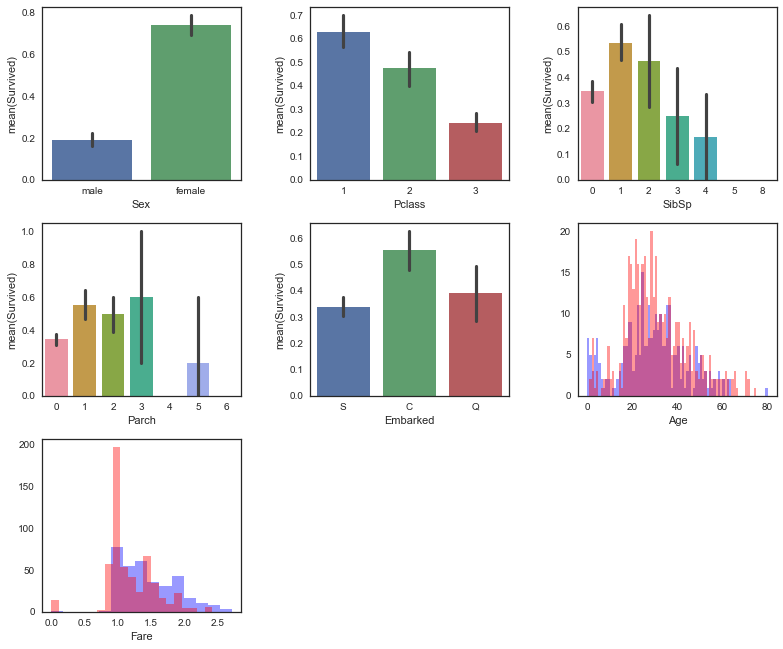

In [10]:
plt.figure(figsize=[12, 10])

plt.subplot(331)
sns.barplot('Sex', 'Survived', data=X_train)

plt.subplot(332)
sns.barplot('Pclass', 'Survived', data=X_train)

plt.subplot(333)
sns.barplot('SibSp', 'Survived', data=X_train)

plt.subplot(334)
sns.barplot('Parch', 'Survived', data=X_train)

plt.subplot(335)
sns.barplot('Embarked', 'Survived', data=X_train)

plt.subplot(336)
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_color)
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_color, axlabel='Age')

plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color=surv_color)
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color=nosurv_color, axlabel='Fare')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

### For the first glance

    1. Female survived better than Male
    2. Survival rate decrease with Pclass
    3. Passenger travelling with SibSp in small group (1-2) generally have a better survival rate
    4. Travelling with Parch in small group also shows a better survival rate
    5. More passengers embarked in port C survived than the others
    6. Children especially babies have a higher survival rate
    7. Survival rate increases with Fare price

In [11]:
print (pd.crosstab(X_train['SibSp'], X_train['Survived']))

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


Though the survival rate is higher for SibSp with 1 and 2, any other size larger than that do not have enought sample to support the conclusion

In [12]:
X_train.loc[:,['Survived','Cabin']].dropna().head(8)

,Survived,Cabin
1,1,C85
3,1,C123
6,0,E46
10,1,G6
11,1,C103
21,1,D56
23,1,A6
27,0,C23 C25 C27


In [13]:
X_train.loc[27]

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                      male
Age                                        19
SibSp                                       3
Parch                                       2
Ticket                                  19950
Fare                                      263
Cabin                             C23 C25 C27
Embarked                                    S
Name: 27, dtype: object

In [14]:
#X_train[X_train['Cabin'].length > 0]
df = X_train[['Name', 'Cabin']].dropna()
multiple_cabin = df['Cabin'].str.split(' ', expand=True)
multiple_cabin[multiple_cabin[1].notnull()]

multiple_cabin.count()

0    204
1     24
2      8
3      2
dtype: int64

In [15]:
multiple_cabin[multiple_cabin[3].notnull()]

,0,1,2,3
311,B57,B59,B63,B66
742,B57,B59,B63,B66


In [16]:
X_train.loc[X_train['PassengerId'].isin([312, 743])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


In [17]:
X_train.loc[X_train['PassengerId'].isin([28, 89, 342, 439, 680, 873])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S


In [18]:
combine[combine['Cabin'].str.contains('B57').fillna(False)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
742,743,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C


In [19]:
combine[combine['Cabin'].str.contains('C23').fillna(False)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S
53,945,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,C23 C25 C27,S
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0,C23 C25 C27,S


In [20]:
combine[combine['Cabin'].str.contains('B51').fillna(False)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
872,873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [21]:
index = multiple_cabin[multiple_cabin[1].notnull() & multiple_cabin[2].isnull()].index + 1
X_train.loc[X_train['PassengerId'].isin(index)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


### Observations

    1. Passengers have multiple Cabin values are normally a Family, and sometimes they shared the same ticket. 
    2. For passengers shared the same Cabin trend to share the same ticket too, and the Fare was also the same and used to be higher, it suggests the Fare price was an aggregate amount of they paid.
    3. There are 4 values have adnormal pattern that start with 'F', it could be typo mistakes.

In [22]:
combine[combine.duplicated('Ticket') == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
71,72,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
88,89,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
117,118,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
119,120,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
120,121,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
122,123,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
124,125,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
125,126,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
137,138,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S


In [126]:
combine[combine['Ticket'] == '113503']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketGroup,EffFare
377,378,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5,C82,C,8.0,42.3
74,966,1,"Geiger, Miss. Amalie",female,35.0,0,0,113503,211.5,C130,C,8.0,42.3
75,967,1,"Keeping, Mr. Edwin",male,32.5,0,0,113503,211.5,C132,C,8.0,42.3
218,1110,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0,1,1,113503,211.5,C80,C,8.0,42.3
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5,C80,C,8.0,42.3


In [127]:
grouped = combine.groupby('Ticket')

k = 0
for name, group in grouped:
    if (len(grouped.get_group(name)) > 1):
        print(group.loc[:, ['Survived','Name', 'Fare', 'Sex']])
        k += 1
    if (k > 10):
        break

     Survived                                               Name  Fare     Sex
257       NaN                               Cherry, Miss. Gladys  86.5  female
504       NaN                              Maioni, Miss. Roberta  86.5  female
759       NaN  Rothes, the Countess. of (Lucy Noel Martha Dye...  86.5  female
     Survived                                    Name   Fare     Sex
262       NaN                       Taussig, Mr. Emil  79.65    male
558       NaN  Taussig, Mrs. Emil (Tillie Mandelbaum)  79.65  female
585       NaN                     Taussig, Miss. Ruth  79.65  female
     Survived                            Name  Fare   Sex
110       NaN  Porter, Mr. Walter Chamberlain  52.0  male
475       NaN     Clifford, Mr. George Quincy  52.0  male
     Survived                                              Name   Fare     Sex
366       NaN  Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  75.25  female
236       NaN                          Warren, Mr. Frank Manley  75.25    ma

### Observations

As expected, female in a family group generally have higher chance of survival, however, this is not a strong 
evidence as the sample is not large enought.

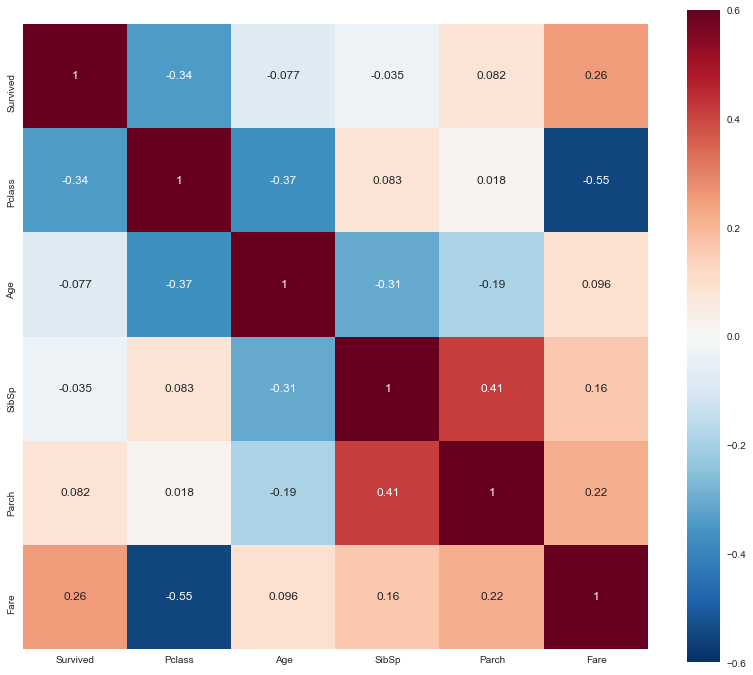

In [128]:
plt.figure(figsize=(14,12))
foo = sns.heatmap(X_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

### Observations

    1. Pclass is higher correlated with Fare price, as expected
    2. As well as Pclass is correlated with Survived
    3. SibSp and Parch are correlated, which is normal

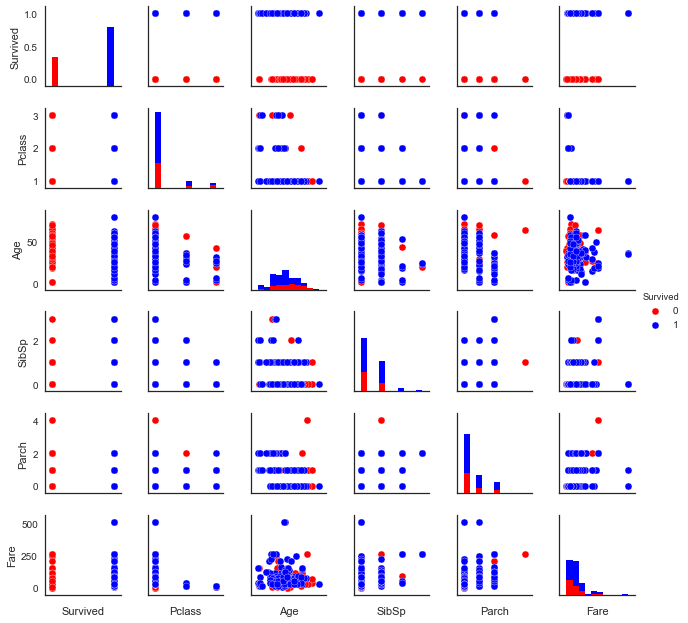

In [129]:
cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
g = sns.pairplot(data=X_train.dropna(), vars=cols, size=1.5, hue='Survived', palette=[nosurv_color, surv_color])
g.set(xticklabels=[])

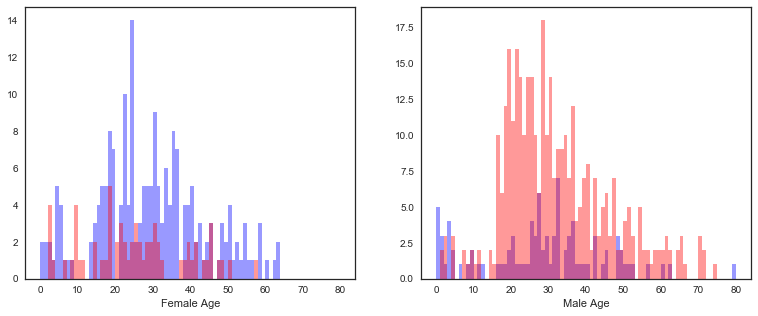

In [130]:
msurv = X_train[(X_train['Survived'] == 1) & (X_train['Sex'] == 'male')]
mno_surv = X_train[(X_train['Survived'] == 0) & (X_train['Sex'] == 'male')]
fsurv = X_train[(X_train['Survived'] == 1) & (X_train['Sex'] == 'female')]
fno_surv = X_train[(X_train['Survived'] == 0) & (X_train['Sex'] == 'female')]

plt.figure(figsize=[13, 5])
plt.subplot(121)
sns.distplot(fsurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_color)
sns.distplot(fno_surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_color,
            axlabel='Female Age')
plt.subplot(122)
sns.distplot(msurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=surv_color)
sns.distplot(mno_surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color=nosurv_color,
            axlabel='Male Age')

### Observations

    1. Male age in between 20 and 40 were hardly to survive
    2. Baby boys are on the opposite side, however

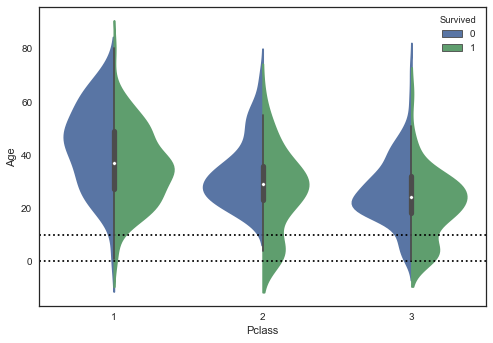

In [131]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=X_train, split=True)
plt.hlines([0, 10], xmin=-1, xmax=3, linestyles="dotted")

### Observations

    1. Pclass = 1 did not have as many as children than the other two classes
    2. Children in Pclass = 2 and Pclass = 3 have higher survivual rate   

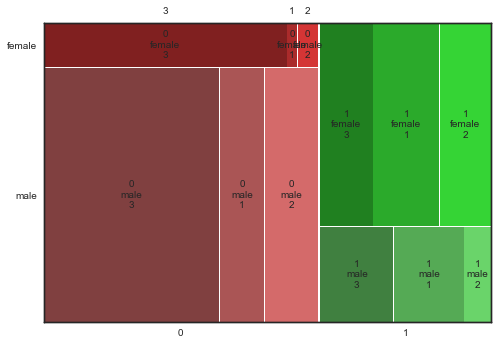

In [132]:
foo = mosaic(X_train, ["Survived", "Sex", "Pclass"])

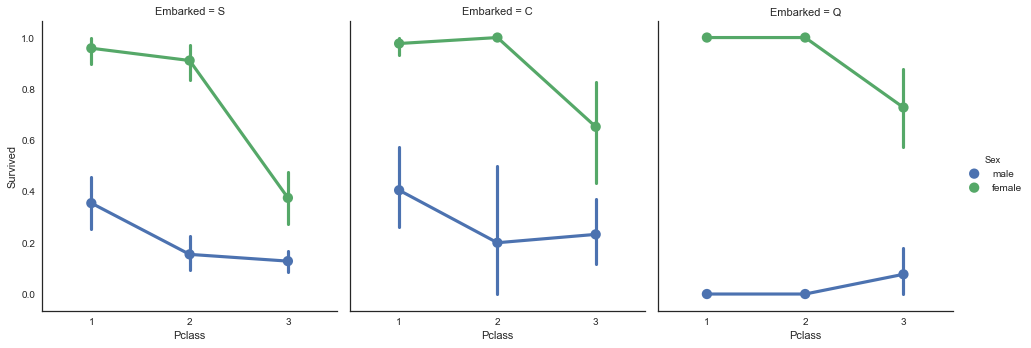

In [133]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", col="Embarked",
                   data=X_train, aspect=0.9, size=5, ci=95.0)

### Observations

    1. Almost all female that died are in Pclass = 3
    2. Male embarked at port Q have very low survivual rate
    3. Still Pclass = 3 are generally lower chance to survive

Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


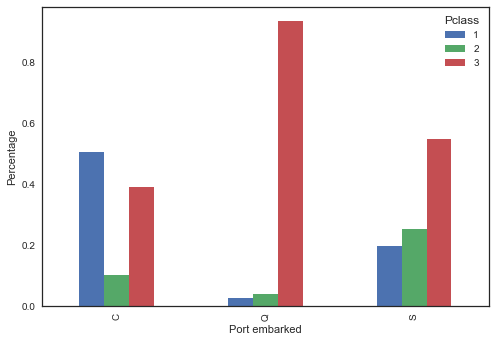

In [23]:
tab = pd.crosstab(X_train['Embarked'], X_train['Pclass'])
print(tab)

dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

### Observations

    1. Passengers embarked at port Q were mostly Pclass = 3

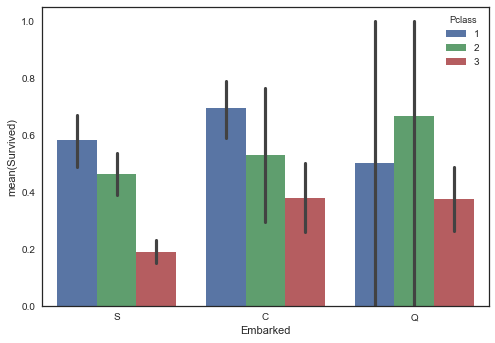

In [135]:
sns.barplot(x="Embarked", y="Survived", hue="Pclass", data=X_train)

Sex       female  male
Embarked              
C             73    95
Q             36    41
S            203   441


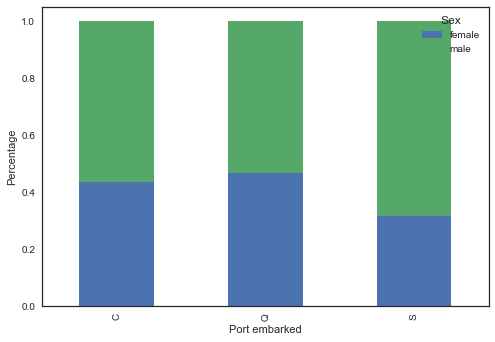

In [136]:
tab = pd.crosstab(X_train['Embarked'], X_train['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Port embarked')
dummy = plt.ylabel('Percentage')

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


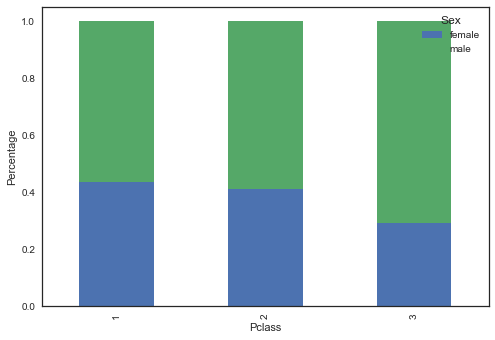

In [137]:
tab = pd.crosstab(X_train['Pclass'], X_train['Sex'])
print(tab)
dummy = tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
dummy = plt.xlabel('Pclass')
dummy = plt.ylabel('Percentage')

Sex    female  male
SibSp              
0         174   434
1         106   103
2          13    15
3          11     5
4           6    12
5           1     4
8           3     4
Sex    female  male
Parch              
0         194   484
1          60    58
2          49    31
3           4     1
4           2     2
5           4     1
6           1     0


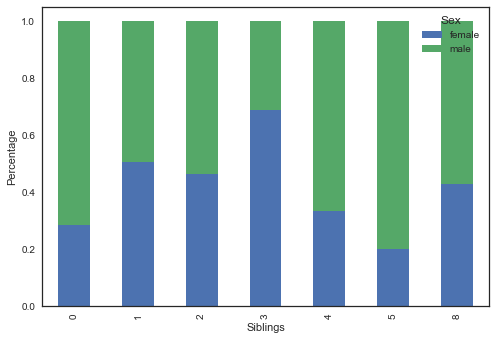

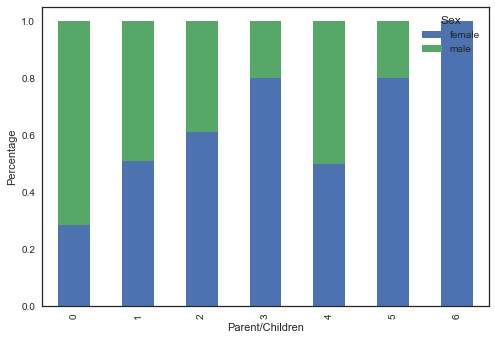

In [138]:
sib = pd.crosstab(X_train['SibSp'], X_train['Sex'])
print(sib)
dummy = sib.div(sib.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Siblings')
dummy = plt.ylabel('Percentage')

parch = pd.crosstab(X_train['Parch'], X_train['Sex'])
print(parch)
dummy = parch.div(parch.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
dummy = plt.xlabel('Parent/Children')
dummy = plt.ylabel('Percentage')

### Observations

    1.

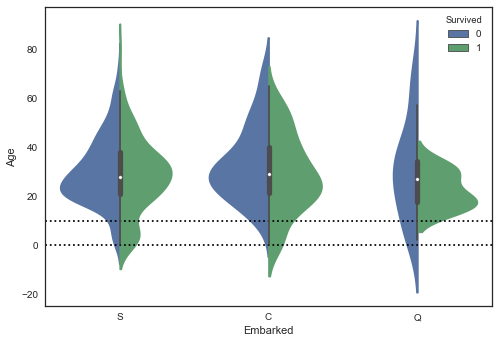

In [139]:
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=X_train, split=True)
plt.hlines([0,10], xmin=-1, xmax=3, linestyles="dotted")

### Observations

    1.

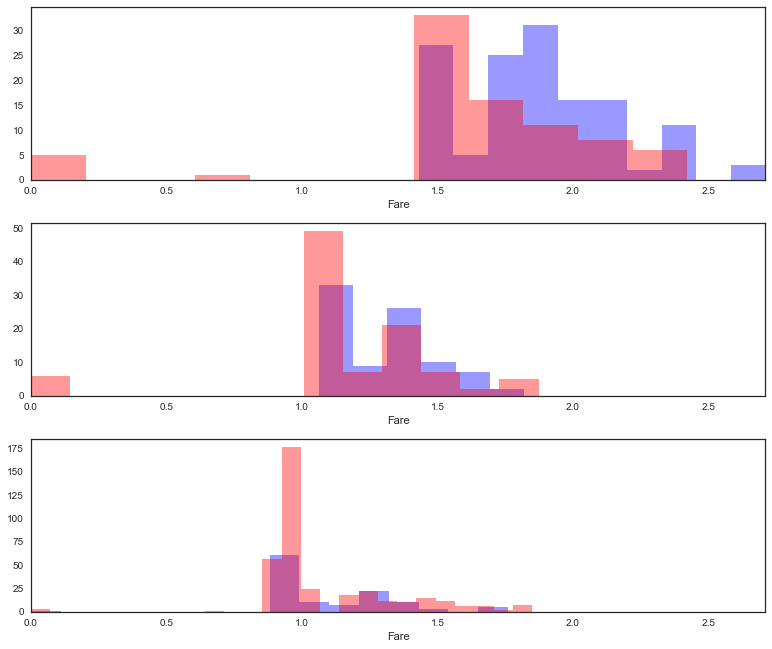

In [140]:
plt.figure(figsize=[12,10])

plt.subplot(311)
ax1 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==1].dropna().values+1), kde=False, color=surv_color)
ax1 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==1].dropna().values+1), kde=False, color=nosurv_color, axlabel='Fare')
ax1.set_xlim(0,np.max(np.log10(X_train['Fare'].dropna().values)))

plt.subplot(312)
ax2 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==2].dropna().values+1), kde=False, color=surv_color)
ax2 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==2].dropna().values+1), kde=False, color=nosurv_color, axlabel='Fare')
ax2.set_xlim(0,np.max(np.log10(X_train['Fare'].dropna().values)))

plt.subplot(313)
ax3 = sns.distplot(np.log10(surv['Fare'][surv['Pclass']==3].dropna().values+1), kde=False, color=surv_color)
ax3 = sns.distplot(np.log10(nosurv['Fare'][nosurv['Pclass']==3].dropna().values+1), kde=False, color=nosurv_color, axlabel='Fare')
ax3.set_xlim(0,np.max(np.log10(X_train['Fare'].dropna().values)))

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

### Observations

    1.

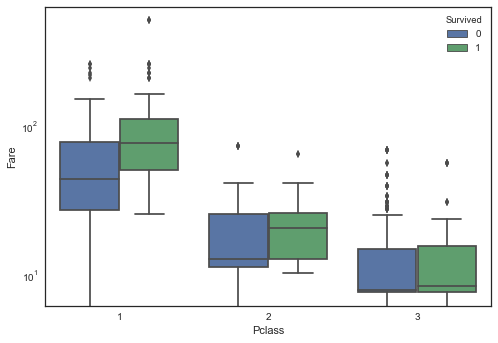

In [141]:
ax = sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=X_train);
ax.set_yscale('log')

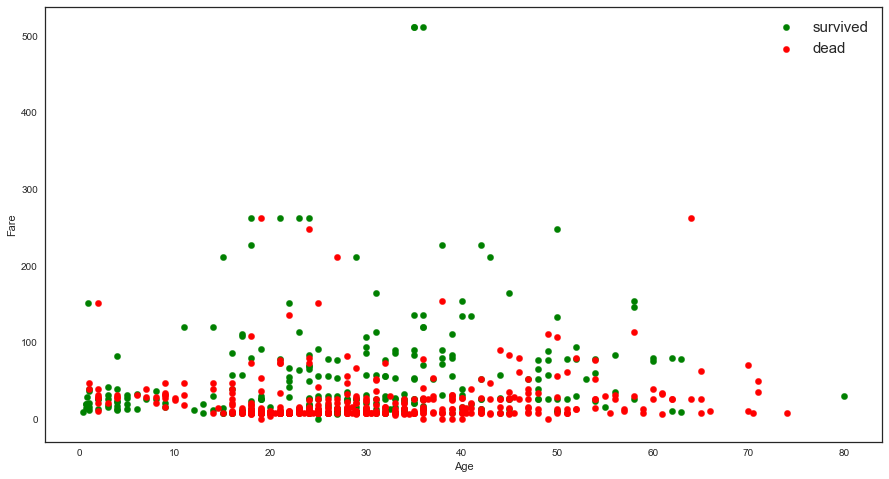

In [24]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(X_train[X_train['Survived']==1]['Age'], X_train[X_train['Survived']==1]['Fare'], c='green', s=40)
ax.scatter(X_train[X_train['Survived']==0]['Age'], X_train[X_train['Survived']==0]['Fare'], c='red', s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

## Proprocess the data

There are 2 missing values in **Embarked**

In [20]:
print(X_train[X_train['Embarked'].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN  


In [21]:
X_train.where((X_train['Pclass'] < 1.5) & \
    (X_train['Sex'] == "female")).groupby(['Embarked','Pclass','Sex','Parch','SibSp']).size()

Embarked  Pclass  Sex     Parch  SibSp
C         1.0     female  0.0    0.0      18
                                 1.0      15
                          1.0    0.0       4
                                 1.0       3
                          2.0    0.0       1
                                 2.0       2
Q         1.0     female  0.0    1.0       1
S         1.0     female  0.0    0.0      14
                                 1.0      13
                                 2.0       1
                          1.0    0.0       6
                                 1.0       4
                          2.0    0.0       4
                                 1.0       4
                                 3.0       2
dtype: int64

In [25]:
X_train['Embarked'].iloc[61] = "C"
X_train['Embarked'].iloc[829] = "C"

There is 1 missing value of **Fare** in the **prediction dataset**

In [23]:
print(X_predict[X_predict['Fare'].isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


I guess we can mock this value using the average fare from **Pclass = 3** and **Embarked = S**

In [78]:
df = X_train[(X_train['Pclass'] == 3) & (X_train['Embarked'] == 'S') &\
            (X_train['SibSp'] == 0) & (X_train['Parch'] == 0)]
print('Mean: %.1f' % df['Fare'].mean())
print('Median: %.1f' % df['Fare'].median())

Mean: 9.7
Median: 7.9


In [79]:
X_predict['Fare'].iloc[152] = df['Fare'].median()

In [26]:
X_train[X_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [26]:
combine = pd.concat([X_train.drop('Survived', 1), X_predict])
survived = X_train['Survived']

In [28]:
#sib = pd.crosstab(combine['Age'], combine['Pclass'])
#print(sib)
combine.groupby('Pclass', as_index=False)['Age'].median()

,Pclass,Age
0,1,39.0
1,2,29.0
2,3,24.0


In [29]:
combine[combine['Sex'] == 'female'].groupby('Pclass', as_index=False)['Age'].median()

,Pclass,Age
0,1,36.0
1,2,28.0
2,3,22.0


In [30]:
combine[combine['Sex'] == 'male'].groupby('Pclass', as_index=False)['Age'].median()

,Pclass,Age
0,1,42.0
1,2,29.5
2,3,25.0


In [27]:
combine['UnknownAge'] = combine['Age'].isnull()

In [28]:
combine['Baby'] = combine['Age'] <= 4
combine['Child'] = (combine['Age'] > 4) & (combine['Age'] <= 10)
combine['Young'] = (combine['Age'] > 15) & (combine['Age'] <= 30)
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
combine['Alone']  = (combine['SibSp'] + combine['Parch']) == 0
combine['Title'] = combine['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

Update adnormal Cabin values

In [29]:
combine.loc[combine['PassengerId'] == 76, 'Cabin'] = 'G73'
combine.loc[combine['PassengerId'] == 129, 'Cabin'] = 'E69'
combine.loc[combine['PassengerId'] == 700, 'Cabin'] = 'G63'
combine.loc[combine['PassengerId'] == 716, 'Cabin'] = 'G73'

In [30]:
combine.groupby('Title', as_index=False)['Age'].count()

,Title,Age
0,Capt,1
1,Col,4
2,Don,1
3,Dona,1
4,Dr,7
5,Jonkheer,1
6,Lady,1
7,Major,2
8,Master,53
9,Miss,210


In [32]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }

combine['Title'] = combine['Title'].map(Title_Dictionary)

# combine["Title"] = combine["Title"].replace(\
#     ['Lady', 'the Countess', 'Countess', 'Capt', \
#      'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
# combine['Title'] = combine['Title'].replace(['Mlle', 'Mme', 'Mrs', 'Ms'], 'Miss')
# combine['Title'] = combine['Title'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Rare': 3})

In [37]:
grouped_train = combine.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()

grouped_test = combine.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [38]:
grouped_median_train

PassengerId   Age  SibSp  Parch       Fare  UnknownAge  \
Sex    Pclass Title                                                             
female 1      Miss           369.0  30.0    0.0    0.0   88.25000         0.0   
              Mrs            499.0  40.0    1.0    0.0   79.20000         0.0   
              Officer        797.0  49.0    0.0    0.0   25.92920         0.0   
              Royalty        658.5  40.5    0.5    0.0   63.05000         0.0   
       2      Miss           437.5  24.0    0.0    0.0   13.00000         0.0   
              Mrs            439.5  31.5    1.0    0.0   26.00000         0.0   
       3      Miss           372.0  18.0    0.0    0.0    8.75625         0.0   
              Mrs            405.5  31.0    1.0    1.0   15.97500         0.0   
male   1      Master         446.0   4.0    1.0    2.0  120.00000         0.0   
              Mr             463.0  40.0    0.0    0.0   42.40000         0.0   
              Officer        648.0  51.0    0.0    0.0   35.50000         0.0   
              Royalty        600.0  40.0    0.0    0.0   27.72080         0.0   
       2      Master         408.0   1.0    1.0    1.0   26.00000         0.0   
              Mr             440.0  31.0    0.0    0.0   13.00000         0.0   
              Officer        358.5  46.5    0.0    0.0   13.00000         0.0   
       3      Master         270.5   4.0    3.5    1.0   28.51250         0.0   
              Mr             472.0  26.0    0.0    0.0    7.89580         0.0   

                       Baby  Child  Young  FamilySize  Alone  TicketGroup  
Sex    Pclass Title                                                        
female 1      Miss      0.0    0.0    1.0         1.0    1.0         45.5  
              Mrs       0.0    0.0    0.0         2.0    0.0         40.0  
              Officer   0.0    0.0    0.0         1.0    1.0          0.0  
              Royalty   0.0    0.0    0.0         1.5    0.5          0.0  
       2      Miss      0.0    0.0    0.0         1.0    1.0          0.0  
              Mrs       0.0    0.0    0.0         2.0    0.0         68.0  
       3      Miss      0.0    0.0    0.0         1.0    1.0          0.0  
              Mrs       0.0    0.0    0.0         3.0    0.0        118.5  
male   1      Master    1.0    0.0    0.0         4.0    0.0         15.0  
              Mr        0.0    0.0    0.0         1.0    1.0          0.0  
              Officer   0.0    0.0    0.0         1.0    1.0          0.0  
              Royalty   0.0    0.0    0.0         1.0    1.0          0.0  
       2      Master    1.0    0.0    0.0         3.0    0.0         74.0  
              Mr        0.0    0.0    0.0         1.0    1.0          0.0  
              Officer   0.0    0.0    0.0         1.0    1.0          0.0  
       3      Master    0.0    0.0    0.0         6.0    0.0        127.5  
              Mr        0.0    0.0    0.0         1.0    1.0          0.0

In [39]:
titles_dummies = pd.get_dummies(combine['Title'], prefix='Title')
combine = pd.concat([combine, titles_dummies], axis=1)
combine.drop('Title', axis=1, inplace=True)
combine.drop('Name', axis=1, inplace=True)

Add a column **TicketGroup** for those passengers shared the same ticket, and **EffFare** for the average of their fare

In [34]:
grouped = combine.groupby('Ticket')

k = 0
for name, group in grouped:
    if (len(grouped.get_group(name)) > 1):
        #print(len(grouped.get_group(name)), combine[combine['Ticket'] == name]['Fare'].mean())
        combine.loc[combine['Ticket'] == name, 'TicketGroup'] = k
        #combine.loc[combine['Ticket'] == name, 'EffFare'] = combine[combine['Ticket'] == name]['Fare'] / len(grouped.get_group(name))
        #combine.loc[combine['Ticket'] == name, 'Fare'] = combine[combine['Ticket'] == name]['Fare'] / len(grouped.get_group(name))
        k += 1

In [35]:
combine['TicketGroup'] = combine['TicketGroup'].fillna(0)
#combine['EffFare'] = combine['EffFare'].fillna(0)

In [36]:
combine.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,UnknownAge,Baby,Child,Young,FamilySize,Alone,Title,TicketGroup
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,False,True,2,False,Mr,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,False,2,False,Mrs,189.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,False,True,1,True,Miss,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,False,False,2,False,Mrs,19.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,False,False,1,True,Mr,0.0


In [41]:
combine = combine.drop(['PassengerId'], axis=1)

In [42]:
combine['Cabin'] = combine['Cabin'].fillna('N')
combine['Cabin'] = combine['Cabin'].str[0]

In [43]:
combine['Sex'] = combine['Sex'].map({'female': 0, 'male': 1})

In [44]:
combine['UnknownAge'] = combine['UnknownAge'].astype(int)
combine['Baby'] = combine['Baby'].astype(int)
combine['Child'] = combine['Child'].astype(int)
combine['Young'] = combine['Young'].astype(int)
combine['Alone'] = combine['Alone'].astype(int)

In [45]:
combine.loc[(combine['Age'].isnull()) & (combine['Sex'] == 0) & (combine['Pclass'] == 1), 'Age'] = '36'
combine.loc[(combine['Age'].isnull()) & (combine['Sex'] == 0) & (combine['Pclass'] == 2), 'Age'] = '28'
combine.loc[(combine['Age'].isnull()) & (combine['Sex'] == 0) & (combine['Pclass'] == 3), 'Age'] = '22'
combine.loc[(combine['Age'].isnull()) & (combine['Sex'] == 1) & (combine['Pclass'] == 1), 'Age'] = '42'
combine.loc[(combine['Age'].isnull()) & (combine['Sex'] == 1) & (combine['Pclass'] == 2), 'Age'] = '29.5'
combine.loc[(combine['Age'].isnull()) & (combine['Sex'] == 1) & (combine['Pclass'] == 3), 'Age'] = '25'

In [46]:
combine.groupby('Title', as_index=False)['Age'].count()

KeyError: 'Title'

ValueError: cannot convert float NaN to integer

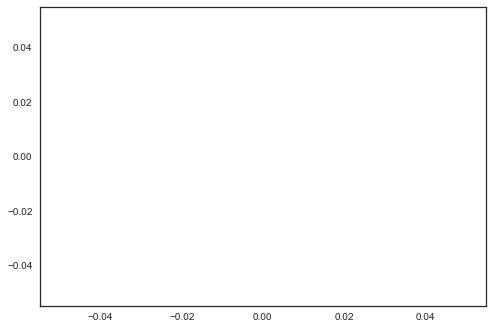

In [47]:
sns.distplot(combine['Fare'], kde=False)

In [168]:
#combine['FareBand'] = pd.qcut(combine['Fare'], 8)
#combine.groupby('FareBand', as_index=False)['Age'].count()

In [169]:
#combine = combine.drop('FareBand', axis=1)

In [170]:
combine[combine['Fare'] > 33].count()

Pclass         304
Sex            304
Age            304
SibSp          304
Parch          304
Fare           304
Cabin          304
Embarked       304
UnknownAge     304
Baby           304
Child          304
Young          304
FamilySize     304
Alone          304
Title          304
TicketGroup    304
EffFare        304
dtype: int64

In [171]:
combine.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,UnknownAge,Baby,Child,Young,FamilySize,Alone,Title,TicketGroup,EffFare
0,3,1,22,1,0,7.2500,N,S,0,0,0,1,2,0,2,0.0,0.00000
1,1,0,38,1,0,71.2833,C,C,0,0,0,0,2,0,1,189.0,35.64165
2,3,0,26,0,0,7.9250,N,S,0,0,0,1,1,1,1,0.0,0.00000
3,1,0,35,1,0,53.1000,C,S,0,0,0,0,2,0,1,19.0,26.55000
4,3,1,35,0,0,8.0500,N,S,0,0,0,0,1,1,2,0.0,0.00000


In [49]:
combine['Cabin'] = combine['Cabin'].astype('category')
#combine['Cabin'].cat.categories = [0, 1, 2, 3, 4, 5, 6, 7, 8]
cabin_dummies = pd.get_dummies(combine['Cabin'], prefix='Cabin')
combine = pd.concat([combine, cabin_dummies], axis=1)
combine.drop('Cabin', axis=1, inplace=True)

In [48]:
#combine['Embarked'] = combine['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
embarked_dummies = pd.get_dummies(combine['Embarked'], prefix='Embarked')
combine = pd.concat([combine, embarked_dummies], axis=1)
combine.drop('Embarked', axis=1, inplace=True)

In [71]:
def process_ticket():
    
    global combine
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = list(map(lambda t : t.strip(), ticket))
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combine['Ticket'] = combine['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combine['Ticket'], prefix='Ticket')
    combine = pd.concat([combine, tickets_dummies], axis=1)
    combine.drop('Ticket', inplace=True, axis=1)    

In [72]:
process_ticket()

In [73]:
from sklearn.preprocessing import MinMaxScaler

def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data

combine = normalize_age(combine)

In [90]:
def normalize_fare(data):
    scaler = MinMaxScaler()
    data["Fare"] = scaler.fit_transform(data["Fare"].values.reshape(-1,1))
    return data

combine = normalize_fare(combine)

In [91]:
combine['Cabin']

KeyError: 'Cabin'

In [92]:
X_predict = combine.iloc[len(X_train):]
X_train = combine.iloc[:len(X_train)]
X_train['Survived'] = survived

In [178]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,UnknownAge,Baby,Child,Young,FamilySize,Alone,Title,TicketGroup,EffFare,Survived
0,3,1,0.273456,1,0,0.014151,7,0,0,0,0,1,2,0,2,0.0,0.00000,0
1,1,0,0.473882,1,0,0.139136,2,1,0,0,0,0,2,0,1,189.0,35.64165,1
2,3,0,0.323563,0,0,0.015469,7,0,0,0,0,1,1,1,1,0.0,0.00000,1
3,1,0,0.436302,1,0,0.103644,2,0,0,0,0,0,2,0,1,19.0,26.55000,1
4,3,1,0.436302,0,0,0.015713,7,0,0,0,0,0,1,1,2,0.0,0.00000,0


In [93]:
X_train.to_csv('./data/train_processed.csv', index=False)
X_predict.to_csv('./data/test_processed.csv', index=False)

In [76]:
grouped = combine[(combine['Parch'] == 0) & (combine['SibSp'] == 0)].groupby('Fare', as_index=False)

for name, group in grouped:
    groupSize = len(combine[combine['Fare'] == name])
    if (groupSize > 1 and groupSize < 5):
        print(combine[combine['Fare'] == name][['Name', 'Sex', 'Fare', 'Embarked', 'Pclass', 'SibSp', 'Parch']])

                           Name   Sex    Fare Embarked  Pclass  SibSp  Parch
843  Lemberopolous, Mr. Peter L  male  6.4375        C       3      0      0
116            Thomas, Mr. John  male  6.4375        C       3      0      0
133       Thomas, Mr. Charles P  male  6.4375        C       3      1      0
                           Name   Sex    Fare Embarked  Pclass  SibSp  Parch
202  Johanson, Mr. Jakob Alfred  male  6.4958        S       3      0      0
371   Wiklund, Mr. Jakob Alfred  male  6.4958        S       3      1      0
232     Wiklund, Mr. Karl Johan  male  6.4958        S       3      1      0
                             Name     Sex  Fare Embarked  Pclass  SibSp  Parch
143           Burke, Mr. Jeremiah    male  6.75        Q       3      0      0
654  Hegarty, Miss. Hanora "Nora"  female  6.75        Q       3      0      0
                                       Name     Sex  Fare Embarked  Pclass  \
825                         Flynn, Mr. John    male  6.95        Q   

                                         Name     Sex     Fare Embarked  \
52   Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  76.7292        C   
645                 Harper, Mr. Henry Sleeper    male  76.7292        C   
681                        Hassab, Mr. Hammad    male  76.7292        C   

     Pclass  SibSp  Parch  
52        1      1      0  
645       1      1      0  
681       1      0      0  
                                     Name     Sex     Fare Embarked  Pclass  \
275     Andrews, Miss. Kornelia Theodosia  female  77.9583        S       1   
627         Longley, Miss. Gretchen Fiske  female  77.9583        S       1   
765  Hogeboom, Mrs. John C (Anna Andrews)  female  77.9583        S       1   

     SibSp  Parch  
275      1      0  
627      0      0  
765      1      0  
                                                  Name     Sex   Fare  \
290                       Barber, Miss. Ellen "Nellie"  female  78.85   
741                      Cavendish, Mr. Tyre